<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Galario, Adrian Q.<br>
    201814169 <br>
   58051</i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [4]:
df_prices = pd.read_csv(r'C:\Users\EyyGiee\Desktop\Bebang\bebang prices.csv')
df_sales = pd.read_csv(r'C:\Users\EyyGiee\Desktop\Bebang\bebang sales.csv')


In [5]:
df_prices

,Unnamed: 0,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
0,price per piece,35,25,20,35,50,40,40,45,30,40,45,45
1,cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [6]:
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [7]:
sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices.set_index('Unnamed: 0'))[0] 
costs_mat = np.array(df_prices.set_index('Unnamed: 0'))[1]

price_reshaped=np.reshape(prices_mat,(12,1))
cost_reshaped=np.reshape(costs_mat,(12,1))

print(sales_mat.shape)
print(price_reshaped.shape)
print(cost_reshaped.shape)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [8]:
## Function that returns and prints the monthly sales and profit for each month
def monthly_sales(price, cost, sales):
    monthly_revenue = sum(sales*price)
    monthly_costs = sum(sales*cost)
    monthly_profits = (monthly_revenue - monthly_costs)
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [9]:
### Using the monthly_sales function to compute for the revenue, cost, and profit
## Then passing the values to month_rev, month_cost, and month_profit
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)

### printing the values
print("Monthly Revenue(Starting from the month of January): \n", month_rev)
print("\nYearly Revenue: \n", sum(month_rev))
print("\nMonthly Cost(Starting from the month of January): \n", month_cost)
print("\nYearly Cost: \n", sum(month_cost))
print("\nMonthly Profit(Starting from the month of January): \n", month_profit)
print("\nYearly Profit: \n", sum(month_profit))

Monthly Revenue(Starting from the month of January): 
 [216510 116750  84900  26985 208850  17360  18760  19035  12090  22960
 260775 422010]

Yearly Revenue: 
 1426985

Monthly Cost(Starting from the month of January): 
 [154650  70050  42450  15420 146195  13454  14070  10575   6045  14350
 185440 290718]

Yearly Cost: 
 963417

Monthly Profit(Starting from the month of January): 
 [ 61860  46700  42450  11565  62655   3906   4690   8460   6045   8610
  75335 131292]

Yearly Profit: 
 463568


## Part 2: Flavor Sales

In [10]:
## Function that returns and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = sales*price
    flavor_costs = sales*cost
    flavor_profits = flavor_revenue - flavor_costs  
    return flavor_profits.flatten()

In [11]:

### Using the flavor_sales function to compute for the profit 
## Then passing the values to flavor_profit variable
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)

## Values of profit of flavors will be inserted here
flavor1 = []
flavor2 = []
flavor3 = []
flavor4 = []
flavor5 = []
flavor6 = []

flavor7 = []
flavor8 = []
flavor9 = []
flavor10 = []
flavor11 = []
flavor12 = []

## Loop that will append the values(profit) to their respective variables above 
## The variables above was created so that the sum can be computed by row(to get the yearly profit per flavor)
## Unlike getting the sum of flavor_profits inside the function flavor_sales, it will get the sum per column(which will get the profit of all flavor per month)
for x in flavor_profit:
    if len(flavor1)<=11:
        flavor1.append(x)
    elif len(flavor2)<=11:
        flavor2.append(x)
    elif len(flavor3)<=11:
        flavor3.append(x)
    elif len(flavor4)<=11:
        flavor4.append(x)
    elif len(flavor5)<=11:
        flavor5.append(x)
    elif len(flavor6)<=11:
        flavor6.append(x)
    elif len(flavor7)<=11:
        flavor7.append(x)
    elif len(flavor8)<=11:
        flavor8.append(x)
    elif len(flavor9)<=11:
        flavor9.append(x)
    elif len(flavor10)<=11:
        flavor10.append(x)
    elif len(flavor11)<=11:
        flavor11.append(x)
    elif len(flavor12)<=11:
        flavor12.append(x)
        
## Profit of each flavor per year        
flavor_profits = np.array([sum(flavor1),sum(flavor2),sum(flavor3),sum(flavor4),sum(flavor5),sum(flavor6),sum(flavor7),sum(flavor8),sum(flavor9),
                          sum(flavor10),sum(flavor11),sum(flavor12)])

### Printing the values
print("The row represents each flavor while the column represents the months")
print("The order of flavor and months in rows and columns is the same as in df_sales\n")
print("Profit of Flavor per Month: \n", flavor_profit)
print("\nThe order of the flavor is the same as in df_sales\n")
print("Flavor Profit per Year: \n", flavor_profits)

The row represents each flavor while the column represents the months
The order of flavor and months in rows and columns is the same as in df_sales

Profit of Flavor per Month: 
 [ 7810  5240  3640  2355 13410   504   890   820   345  1170  3003 12586
  2100  3240  3440   480  1845     9    30     0    15    90  4056  7672
  5990  6740  8540   210  7005   702   360   960  1125  1470 10153 22428
  1240  1120  1140   345  2970   108   320   820   345   540  3900  7924
  6450  4980  8850  1470  2655   882   430  1920   390  1065  7137 12558
  2100  3720  3690  1170  2445   234   450   440   810   615  2691  6384
  9810  3800  1540   210  2205   135   980   660   345   540  7176  8862
  4780  4620  3540   735  1335     0    10     0    15   120  4355  2996
  5980  2030   360  1440 11835    36    50     0   120     0 10257  6412
  3240  1230   480   480   975   666   780   900  1335  1500  8216  3234
  4580  4120   780  1170  1170    63    30   160    30    15  4199  7896
  7780  5860  6450

In [12]:
## Putting the list of flavors into array
flavors = np.array(pd.read_csv("bebang sales.csv", usecols=[0]))

## Converting the arrays into lists
## Using list is easier to match/zip them
fprofit_list = flavor_profits.tolist()
flavor_list = flavors.tolist()

## Matched the two list, to know the profit of each flavor and to be sorted later
matched_list = list(zip(fprofit_list, flavor_list))

### Sorting of the flavors by their profit and displaying the first element(flavors) only 
best_3_flavors = [x[1] for x in sorted(matched_list, reverse=True)]
worst_3_flavors = [x[1] for x in sorted(matched_list)]

## Printing of the three best and worst flavors
print("Best Selling Flavors: \n", best_3_flavors[0:3])
print("\nWorst Selling Flavors: \n", worst_3_flavors[0:3])

Best Selling Flavors: 
 [['choco butter naught'], ['sugar glazed'], ['red velvet']]

Worst Selling Flavors: 
 [['almond honey'], ['furits and nuts'], ['oreo']]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [29]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import csv
%matplotlib inline

#### Entire Dataset

Text(0.5, 1.0, 'Sales of Each Flavor')

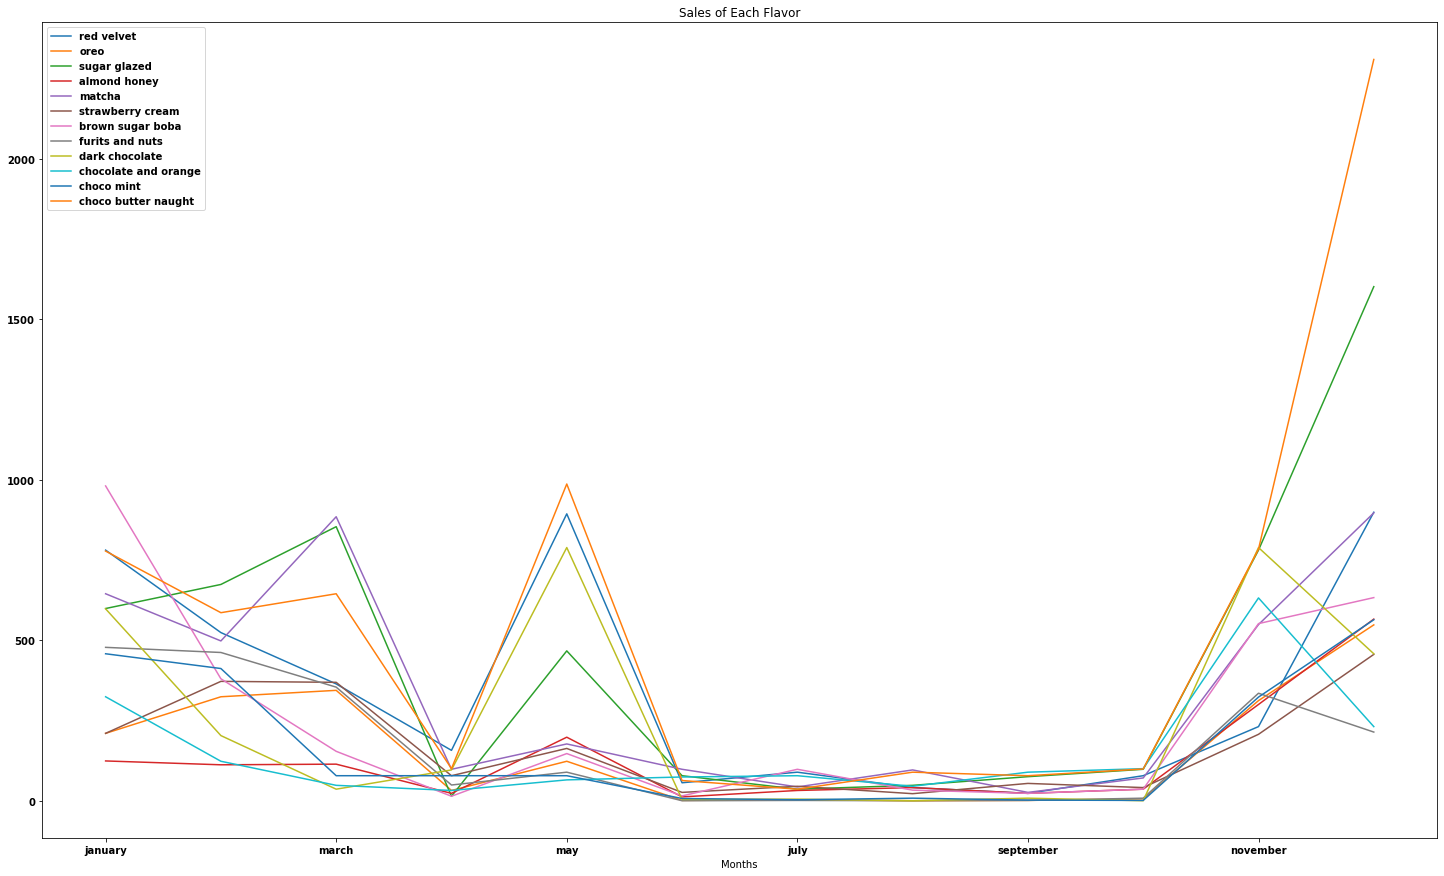

In [33]:
## Graph for Sales of each flavor
## Table inside the original file(bebang sales) was transposed in the excel, columns were converted to rows
df_sales_Transposed = pd.read_csv(r"C:\Users\EyyGiee\Desktop\Bebang\bebang sales(transpose).csv")

## Transposing the table makes it easier to plot the data inside it
## The column header 'flavor' was changed to 'Months'
df_sales_Transposed.plot(x="Months", figsize=(25,15))
plt.title('Sales of Each Flavor')

<BarContainer object of 1 artists>

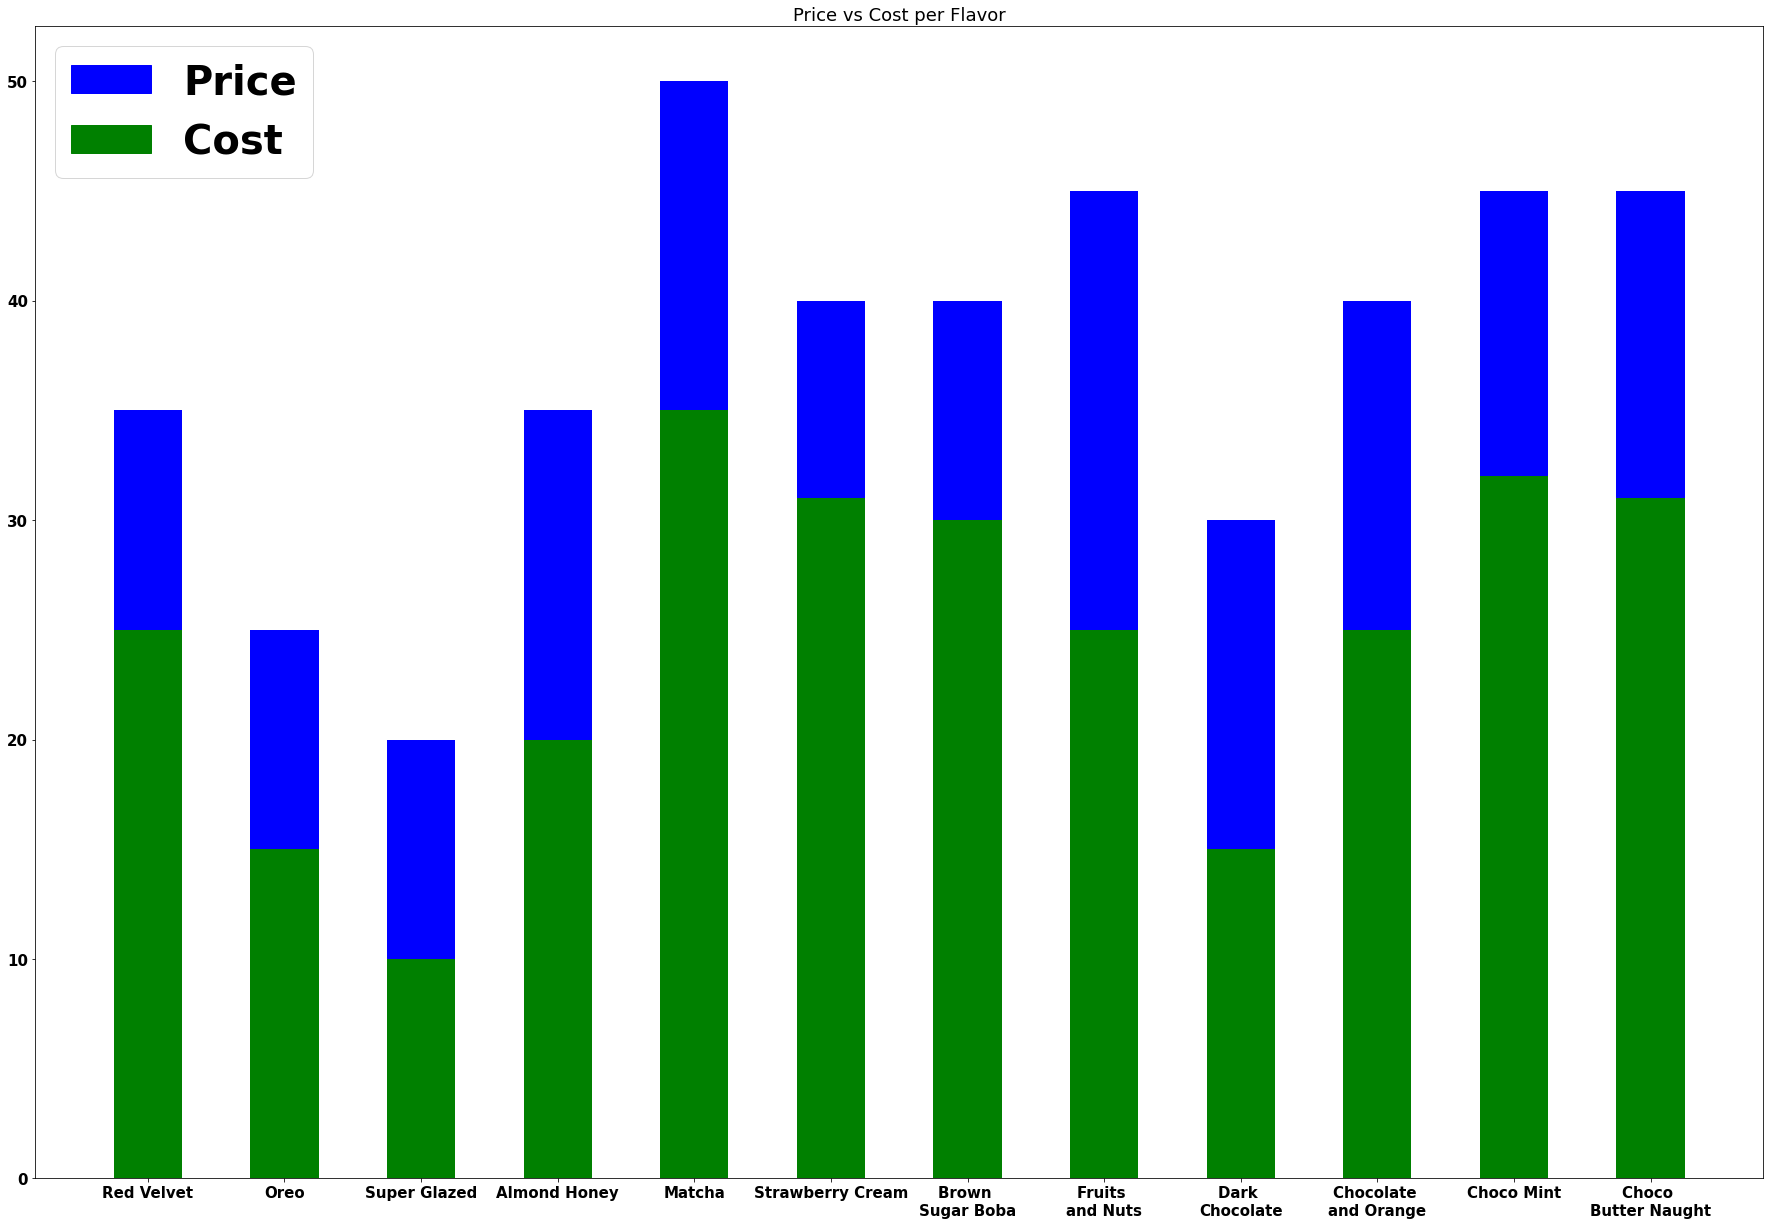

In [34]:
## Graph for Price vs Cost per Flavor
## Declaring the font size and weight to be used in the graph
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

## Declaration of the figure to be used
fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.set_title('Price vs Cost per Flavor')

## For the legends used in the graph
colors = {'Price':'blue', 'Cost':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='upper left', prop={'size': 40})

## Plotting of the values for the bar graph
## Price and cost were plotted in one x-axis per flavor to see the difference between the two variable
ax.bar('Red Velvet' ,prices_mat[0], color = 'b', width = 0.50)
ax.bar('Red Velvet' ,costs_mat[0], color = 'g', width = 0.50)

ax.bar('Oreo' ,prices_mat[1], color = 'b', width = 0.50)
ax.bar('Oreo' ,costs_mat[1], color = 'g', width = 0.50)

ax.bar('Super Glazed' ,prices_mat[2], color = 'b', width = 0.50)
ax.bar('Super Glazed' ,costs_mat[2], color = 'g', width = 0.50)

ax.bar('Almond Honey' ,prices_mat[3], color = 'b', width = 0.50)
ax.bar('Almond Honey' ,costs_mat[3], color = 'g', width = 0.50)

ax.bar('Matcha' ,prices_mat[4], color = 'b', width = 0.50)
ax.bar('Matcha' ,costs_mat[4], color = 'g', width = 0.50)

ax.bar('Strawberry Cream' ,prices_mat[5], color = 'b', width = 0.50)
ax.bar('Strawberry Cream' ,costs_mat[5], color = 'g', width = 0.50)

ax.bar('Brown \nSugar Boba' ,prices_mat[6], color = 'b', width = 0.50)
ax.bar('Brown \nSugar Boba' ,costs_mat[6], color = 'g', width = 0.50)

ax.bar('Fruits \nand Nuts' ,prices_mat[7], color = 'b', width = 0.50)
ax.bar('Fruits \nand Nuts' ,costs_mat[7], color = 'g', width = 0.50)

ax.bar('Dark \nChocolate' ,prices_mat[8], color = 'b', width = 0.50)
ax.bar('Dark \nChocolate' ,costs_mat[8], color = 'g', width = 0.50)

ax.bar('Chocolate \nand Orange' ,prices_mat[9], color = 'b', width = 0.50)
ax.bar('Chocolate \nand Orange' ,costs_mat[9], color = 'g', width = 0.50)

ax.bar('Choco Mint' ,prices_mat[10], color = 'b', width = 0.50)
ax.bar('Choco Mint' ,costs_mat[10], color = 'g', width = 0.50)

ax.bar('Choco \nButter Naught' ,prices_mat[11], color = 'b', width = 0.50)
ax.bar('Choco \nButter Naught' ,costs_mat[11], color = 'g', width = 0.50)

#### Monthly Sales

<BarContainer object of 1 artists>

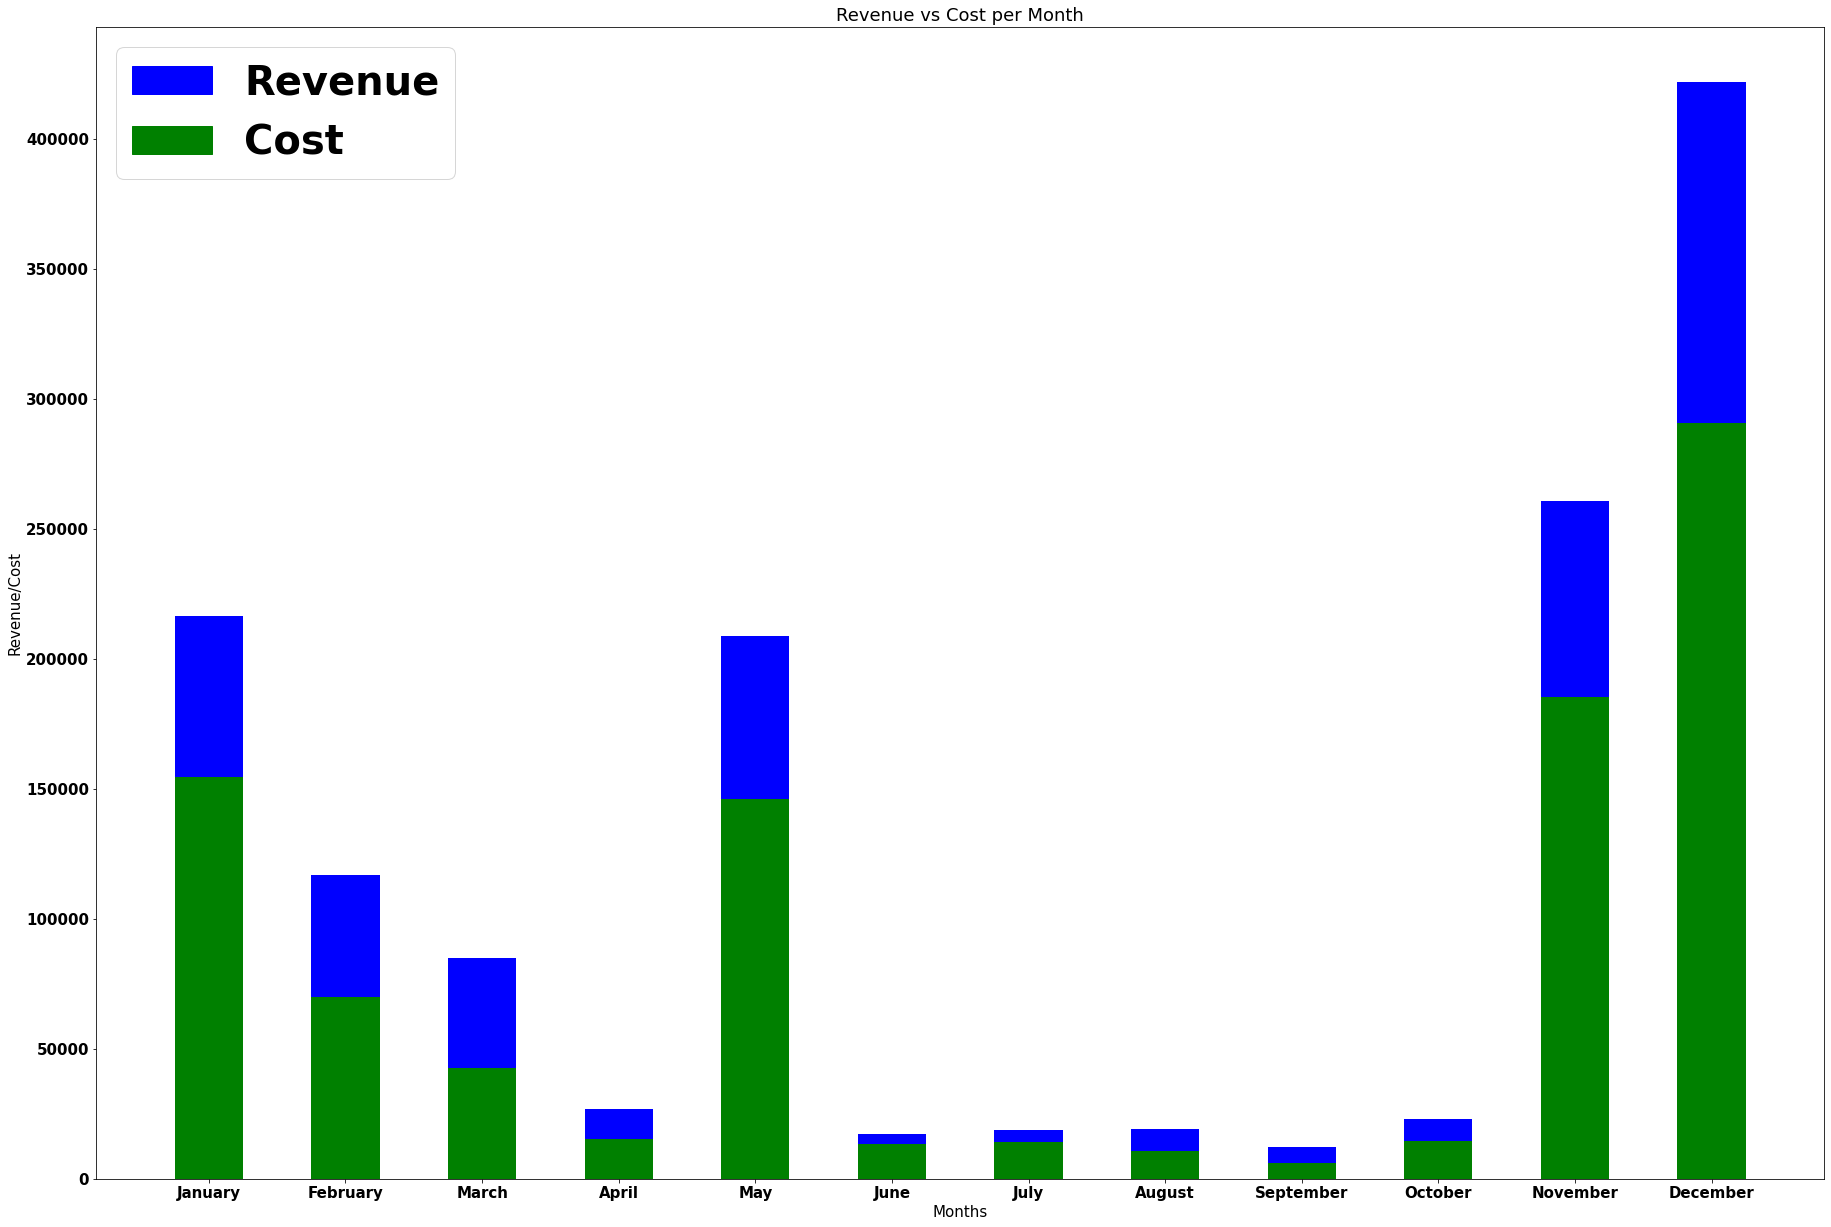

In [26]:
## Graph for Revenue vs Cost per Month
## Declaring the font size and weight to be used in the graph
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

## Declaration of the figure to be used in the graph
fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.set_title('Revenue vs Cost per Month')
ax.set_ylabel('Revenue/Cost')
ax.set_xlabel('Months')

## For the legends used in the graph
colors = {'Revenue':'blue', 'Cost':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='upper left', prop={'size': 40})

## Plotting of the values for the bar graph 
## Revenue and cost were plotted in one x-axis per month to see the difference between the two variable
ax.bar('January' ,month_rev[0], color = 'b', width = 0.50)
ax.bar('January' ,month_cost[0], color = 'g', width = 0.50)

ax.bar('February' ,month_rev[1], color = 'b', width = 0.50)
ax.bar('February' ,month_cost[1], color = 'g', width = 0.50)

ax.bar('March' ,month_rev[2], color = 'b', width = 0.50)
ax.bar('March' ,month_cost[2], color = 'g', width = 0.50)

ax.bar('April' ,month_rev[3], color = 'b', width = 0.50)
ax.bar('April' ,month_cost[3], color = 'g', width = 0.50)

ax.bar('May' ,month_rev[4], color = 'b', width = 0.50)
ax.bar('May' ,month_cost[4], color = 'g', width = 0.50)

ax.bar('June' ,month_rev[5], color = 'b', width = 0.50)
ax.bar('June' ,month_cost[5], color = 'g', width = 0.50)

ax.bar('July' ,month_rev[6], color = 'b', width = 0.50)
ax.bar('July' ,month_cost[6], color = 'g', width = 0.50)

ax.bar('August' ,month_rev[7], color = 'b', width = 0.50)
ax.bar('August' ,month_cost[7], color = 'g', width = 0.50)

ax.bar('September' ,month_rev[8], color = 'b', width = 0.50)
ax.bar('September' ,month_cost[8], color = 'g', width = 0.50)

ax.bar('October' ,month_rev[9], color = 'b', width = 0.50)
ax.bar('October' ,month_cost[9], color = 'g', width = 0.50)

ax.bar('November' ,month_rev[10], color = 'b', width = 0.50)
ax.bar('November' ,month_cost[10], color = 'g', width = 0.50)

ax.bar('December' ,month_rev[11], color = 'b', width = 0.50)
ax.bar('December' ,month_cost[11], color = 'g', width = 0.50)

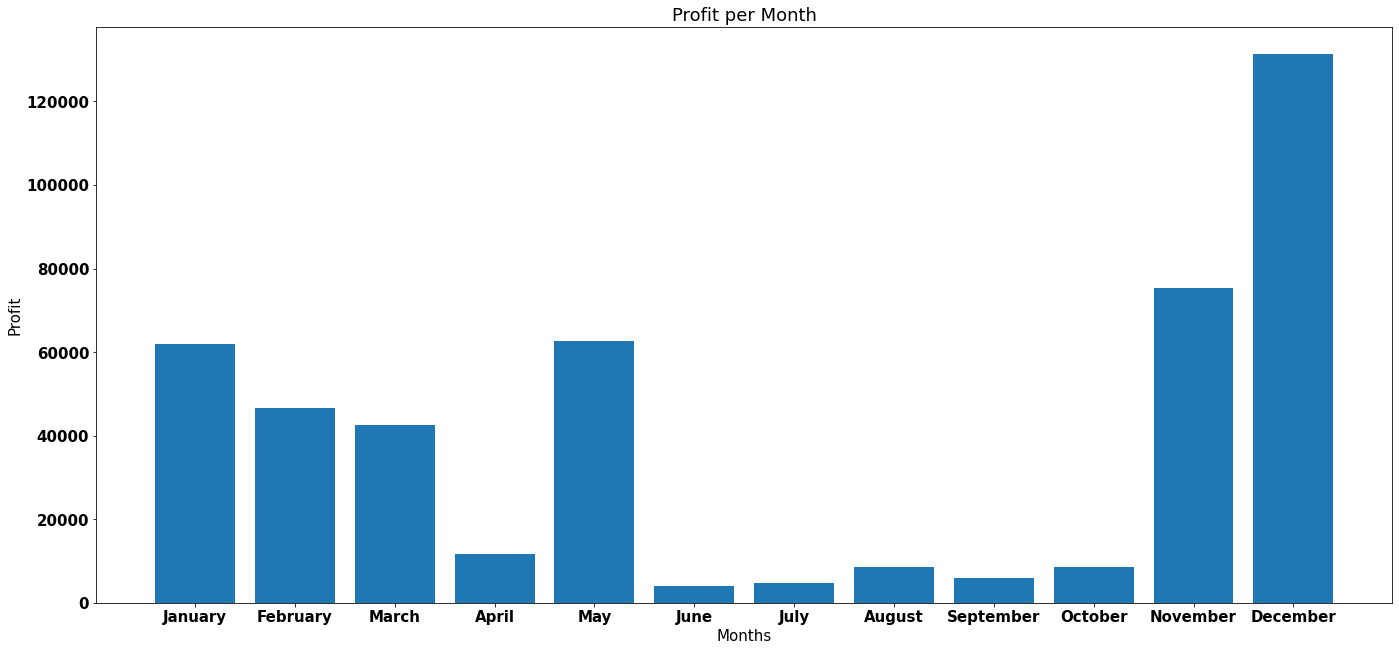

In [35]:
## Graph for profit per month
## Declaration of the figure to be used
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.set_ylabel('Profit')
ax.set_xlabel('Months')
ax.set_title('Profit per Month')

## Declaring the values of each axis
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Profits = month_profit

## Declaration of the axes and printing/showing them
ax.bar(months, Profits)
plt.show()

#### Flavor Sales

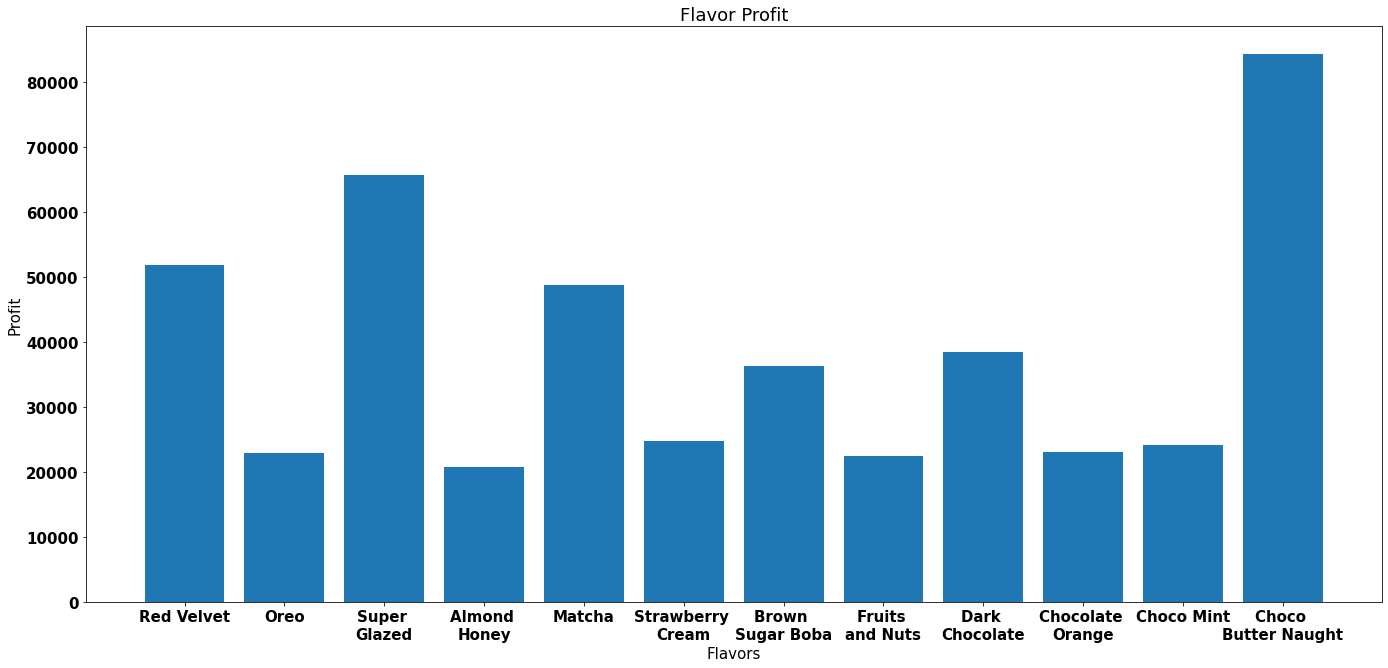

In [36]:
## Graph for Flavor profit
## Declaration of the figure to be used
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.set_ylabel('Profit')
ax.set_xlabel('Flavors')
ax.set_title('Flavor Profit')

## Declaring the values of each axis
flavors = ['Red Velvet', 'Oreo', 'Super \nGlazed', 'Almond \nHoney', 'Matcha', 'Strawberry \nCream', 'Brown \nSugar Boba', 
           'Fruits \nand Nuts', 'Dark \nChocolate', 'Chocolate \nOrange', 'Choco Mint', 'Choco \nButter Naught']
Profits = flavor_profits

## Declaration of the axes and printing/showing them
ax.bar(flavors, Profits)
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

The software reveals that the top three flavors that sell the most for Bebang's business are choco butter naught, matcha, and super glazed, while the worst or bottom three flavors for her business are strawberry cream, oreo, and almond honey after computing and plotting the data from her business. The software also displays the calculated monthly cost, annual cost, yearly revenue, and monthly revenue for all flavors. Bebang makes the most profit in December and the least profit in September, according to the findings. The software also generates Bebang's monthly benefit from all of the flavors. Based on the information gathered, it is suggested that Bebang make a large quantity of the top three best-selling flavors because it will help her company and the expense of producing those flavors will not be wasted and will be recovered through sales. Bebang should also reduce the quantity of the top three worst flavors to help her company avoid spending a lot of money on them without making any profit. Another piece of advice for Bebang is to keep track of the months when the flavors sell best so she can prepare ahead for the amount she'll need to avoid food shortages and excesses. Bebang's company is doing well in general. Bebang's company expenses per flavor are more than offset by the sales she makes. Different marketing techniques can also assist her in growing her company and generating large profits not only for a month, but for the entire year. Bebang could also conduct a customer survey to determine what changes she can make, especially to the flavors that sell the least.